In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tess_sip import SIP
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

%config InlineBackend.print_figure_kwargs={"facecolor" : "w"}

In [3]:
srs_lcs_S04 = lk.search_lightcurve("WASP-50", sector=4, author="TESS-SPOC")
lcs_S04 = srs_lcs_S04.download_all()
display(lcs_S04)

srs_lcs_S31 = lk.search_lightcurve("WASP-50", sector=31, author="TESS-SPOC")
lcs_S31 = srs_lcs_S31.download_all()
display(lcs_S31)

srs_lcs_combined = lk.search_lightcurve("WASP-50", author="TESS-SPOC")
lcs_combined = srs_lcs_combined.download_all()
display(lcs_combined)

LightCurveCollection of 1 objects:
    0: <TessLightCurve LABEL="TIC 382391899" SECTOR=4 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>

LightCurveCollection of 1 objects:
    0: <TessLightCurve LABEL="TIC 382391899" SECTOR=31 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>

LightCurveCollection of 2 objects:
    0: <TessLightCurve LABEL="TIC 382391899" SECTOR=4 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    1: <TessLightCurve LABEL="TIC 382391899" SECTOR=31 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>

In [4]:
sip_kwargs = {"min_period":1.0, "max_period":30.0, "nperiods":600}
bin_kwargs = {"time_bin_size":1.0*u.hr}

r_S04 = SIP(lcs_S04, **sip_kwargs, bin_kwargs=bin_kwargs)
r_S31 = SIP(lcs_S31, **sip_kwargs, bin_kwargs=bin_kwargs)
r_combined = SIP(lcs_combined, **sip_kwargs, bin_kwargs=bin_kwargs)

Lightcurve File Input


/home/mango/miniconda3/envs/tess_sip/lib/python3.9/site-packages/lightkurve/lightcurve.py:1031: LightkurveWarning: The light curve appears to be zero-centered (median=1.32e+03 electron / s +/- 1.13e+04 electron / s); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
Running pixels in aperture: 100%|██████████| 600/600 [00:01<00:00, 523.01it/s]


Lightcurve File Input


/home/mango/miniconda3/envs/tess_sip/lib/python3.9/site-packages/lightkurve/lightcurve.py:1031: LightkurveWarning: The light curve appears to be zero-centered (median=1.41e+03 electron / s +/- 5.61e+03 electron / s); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
Running pixels in aperture: 100%|██████████| 600/600 [00:01<00:00, 520.40it/s]


Lightcurve File Input


/home/mango/miniconda3/envs/tess_sip/lib/python3.9/site-packages/lightkurve/lightcurve.py:1031: LightkurveWarning: The light curve appears to be zero-centered (median=1.39e+03 electron / s +/- 8.78e+03 electron / s); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
Running pixels in aperture: 100%|██████████| 600/600 [00:01<00:00, 506.63it/s]


In [5]:
def plot_pgs(ax, r, title=None):
    periods = r["periods"]
    power_source = r["power"]
    power_background = r["power_bkg"]
    power_relative = power_source / power_background
    
    print(r["periods"][np.argmax(power_relative)])

    ax.semilogy(periods, power_source, label="source")
    ax.semilogy(periods, power_background, label="background")
    ax.semilogy(periods, power_relative, label="source / background")
    ax.legend()

    ax.set_xlabel("Periods")
    ax.set_title(title)

7.7792207792207835
1.6583610188261353
5.404511278195492


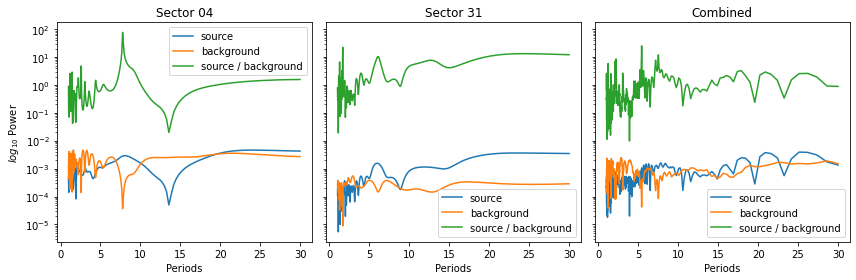

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

data_dict = {"Sector 04":r_S04, "Sector 31":r_S31, "Combined":r_combined}

for (i, (sector, r)) in enumerate(data_dict.items()):
    plot_pgs(axes[i], r, title=sector)

axes[0].set_ylabel(r"$log_{10}$ Power")

fig.tight_layout()

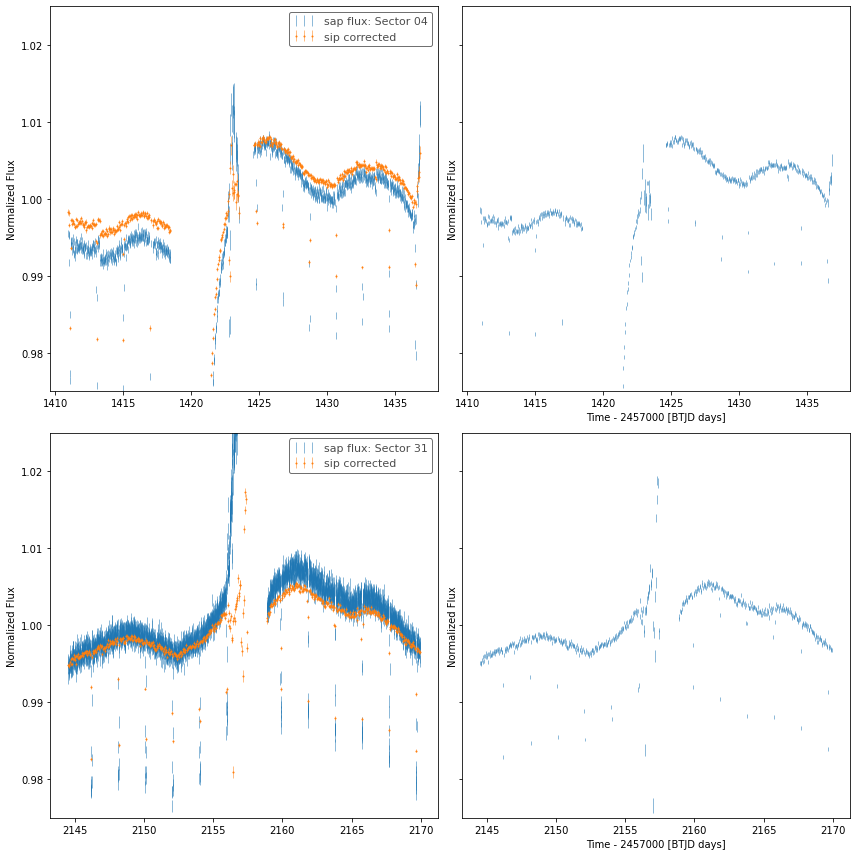

In [7]:
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(12, 12))

for (i, (sector, r)) in enumerate(data_dict.items()):
    if i <= 1:
        lcs_combined[i].errorbar(ax=axes[i, 0], normalize=True, label=f"sap flux: {sector}")
        r["corr_lc"].errorbar(ax=axes[i, 0], marker='.', xlabel="", label="sip corrected")

r_combined["corr_lc"].errorbar(ax=axes[0, 1])
axes[0, 1].set_xlim(*axes[0, 0].get_xlim())

r_combined["corr_lc"].errorbar(ax=axes[1, 1])
axes[1, 1].set_xlim(*axes[1, 0].get_xlim())

axes[-1, -1].set_ylim(0.975, 1.025)
        
fig.tight_layout()